## Import libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read data

In [43]:
data = pd.read_csv("../data/online_shoppers_intention.csv")

## Needed functions/class

### Normalize

In [6]:
from sklearn import preprocessing 

def normalize(df, columns):
    for column in columns:
        x = df[[column]].values.astype(float)
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df[[column]] = x_scaled
    return df

### Plot 

In [35]:
def plot(data, variables):
    f, axes=plt.subplots(2, 3, figsize=(20, 10))

    for i in range(0, len(variables)):
        sns.countplot(data=data, x=variables[i], ax=axes[i//3, i%3])
    for ax in f.axes:
        ax.set_ylabel('')

    plt.tight_layout();

## Feature engineering

### Normalize continous variables

In [44]:
continous_variables = ["ProductRelated_Duration", "BounceRates", "ExitRates"]
normalize(data, continous_variables)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.000000,0.500000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.250000,0.700000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.100000,0.250000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.027883,0.035714,0.145153,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,0.007280,0.000000,0.106667,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,0.002880,0.416667,0.433333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,0.005408,0.000000,0.105263,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Change True/False -> 1/0

In [45]:
data.Weekend.replace([False, True], [0,1], inplace=True)
data.Revenue.replace([False, True], [0,1], inplace=True)

### Encoding categorical variables

In [46]:
categorical_variables = ["Month", "VisitorType"]

all_categorical_variables = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

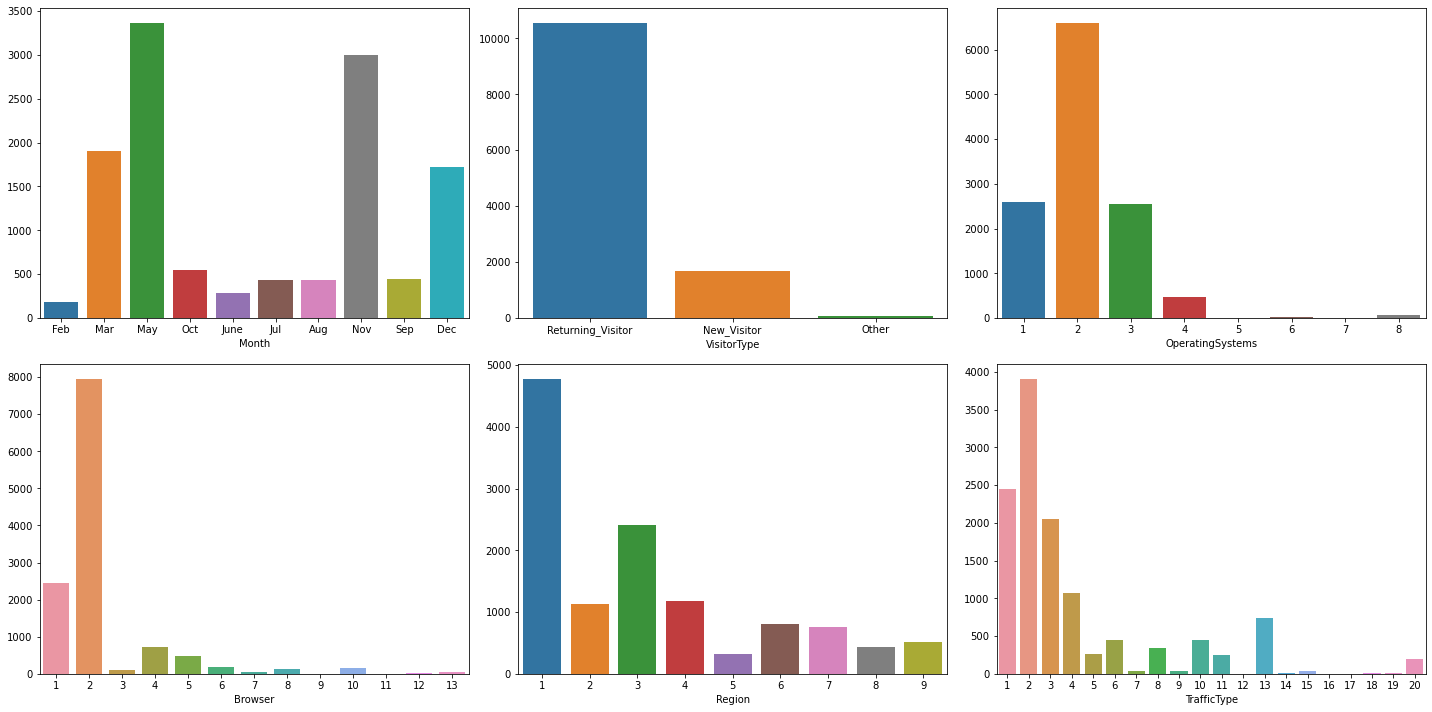

In [39]:
plot(data, all_categorical_variables)

In [47]:
for i in all_categorical_variables:
    data = pd.get_dummies(data, prefix=["OHE" + i], columns=[i])

In [48]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OHETrafficType_11,OHETrafficType_12,OHETrafficType_13,OHETrafficType_14,OHETrafficType_15,OHETrafficType_16,OHETrafficType_17,OHETrafficType_18,OHETrafficType_19,OHETrafficType_20
0,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,0.001000,0.000000,0.500000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,0.000042,0.250000,0.700000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,0.009809,0.100000,0.250000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.027883,0.035714,0.145153,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,0
12326,0,0.0,0,0.0,5,0.007280,0.000000,0.106667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
12327,0,0.0,0,0.0,6,0.002880,0.416667,0.433333,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
12328,4,75.0,0,0.0,15,0.005408,0.000000,0.105263,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0


## Modelling

In [49]:
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering)

In [54]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

def plot_scores(scores):
    x_ticks = list(range(1, len(scores) + 1))
    plt.plot(x_ticks, scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within-cluster sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

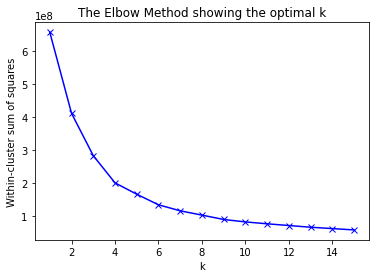

In [55]:
scores = count_wcss_scores(data, 15)
plot_scores(scores)